# llm4code

### Kat Nykiel, Purdue University

### April 12, 2024

This tool provides a demonstration of the use of Web-Based LLMs for programming. This is the second half of an MNT-CURN workshop titled "Introduction to Programming with LLM Coding Assistants". The presentation for the first half can be found [here](presentation.pdf). Little prior experience of coding is required; to run each cell, you just need to press `SHIFT` and `ENTER`.

![MNT-EC, MNT-CURN, and Purdue logos](logos.png)

## Anthropic Claude

This demonstration will depict a plausible use of [Claude](https://claude.ai/chats) for coding. Claude Haiku, the free-tier model, currently outperforms both Gemini and ChatGPT on python coding benchmarks. To follow along with this demonstration, you can sign up for an account with Claude and run the same promps as I do. All of the promps I use are demarcated in the following way:

> This is a prompt



## Simulating Board Game Dice

This notebook focuses on an illustrative sample problem: how would you simulate the rolling of dice in a board game? This is a highly interpretable example, as most of us have real-world experience rolling dice, but many of the same principles carry over to more advanced simulation methods.

![two six-sided dice](dice.png)

This is a Gemini-generated image... notice anything off?

## 

### Simulating a Dice Roll

The prompt:

> Can you write a python function to simulate a six-sided die roll?

Returns the following:

In [10]:
import random

def roll_die():
    """
    Simulates a roll of a six-sided die.
    
    Returns:
        int: The result of the die roll, a number between 1 and 6.
    """
    return random.randint(1, 6)

result = roll_die()
print(f"You rolled a {result}!")

You rolled a 1!


This is great! It returned a working function, and even wrote a test for us. If you run it on your own, your code may vary slightly.

Now, let's ask it a follow up question.

> Can you write another function to roll two dice and return the sum, using this function?

Here, Claude understands the context of what "this" refers to here - our previous roll_dice function.

In [11]:
def roll_two_dice():
    """
    Rolls two six-sided dice and returns the sum of the results.
    
    Returns:
        int: The sum of the two dice rolls.
    """
    die1 = roll_die()
    die2 = roll_die()
    return die1 + die2

total = roll_two_dice()
print(f"The sum of the two dice is {total}.")

The sum of the two dice is 7.


### Simulating Many Dice Rolls

Now that we have a function to simulate two dice rolls, let's create a loop that simulates a large number of dice rolls, representing an entire game.

> Can you write a for loop to simulate N dice rolls?



In [12]:
def simulate_dice_rolls(num_rolls):
    """
    Simulates N dice rolls and returns the results.
    
    Args:
        num_rolls (int): The number of dice rolls to simulate.
    
    Returns:
        list: A list of the results of the dice rolls.
    """
    results = []
    for _ in range(num_rolls):
        results.append(roll_die())
    return results

num_rolls = 10
results = simulate_dice_rolls(num_rolls)
print(f"The results of the {num_rolls} dice rolls are: {results}")

The results of the 10 dice rolls are: [6, 5, 1, 5, 1, 6, 5, 1, 3, 4]


This isn't what we wanted - we want to simulate rolling two six-sided dice, not just one. It's important to add in checks to your code to verify that it's doing what you think it's doing.

> Can you modify simulate_dice_rolls to simulate the rolling of two dice, not just one? Use roll_two_dice

In [13]:
def simulate_dice_rolls(num_rolls):
    """
    Simulates N rolls of two dice and returns the results.
    
    Args:
        num_rolls (int): The number of rolls of two dice to simulate.
    
    Returns:
        list: A list of the sums of the two dice rolls.
    """
    results = []
    for _ in range(num_rolls):
        results.append(roll_two_dice())
    return results

num_rolls = 10
results = simulate_dice_rolls(num_rolls)
print(f"The results of the {num_rolls} rolls of two dice are: {results}")

The results of the 10 rolls of two dice are: [5, 2, 9, 6, 7, 8, 9, 7, 3, 7]


This matches our expectations!

### Performing Statistics

Now that we have a basic "simulator" working, we can perform analysis on our system. This lets us more accurately validate that our system matches theory. Here, we'll calculate the mean and standard deviation of our system after N dice rolls.

> Can you calculate the mean and standard deviation of the dice rolls?

In [14]:
import statistics

def simulate_dice_rolls(num_rolls):
    """
    Simulates N rolls of two dice, calculates the mean and standard deviation of the results, and returns the results.
    
    Args:
        num_rolls (int): The number of rolls of two dice to simulate.
    
    Returns:
        tuple: A tuple containing the list of dice roll results, the mean, and the standard deviation.
    """
    results = []
    for _ in range(num_rolls):
        results.append(roll_two_dice())
    
    mean = statistics.mean(results)
    std_dev = statistics.stdev(results)
    
    return results, mean, std_dev

num_rolls = 100
results, mean, std_dev = simulate_dice_rolls(num_rolls)
print(f"The results of the {num_rolls} rolls of two dice are: {results}")
print(f"The mean of the dice roll results is: {mean:.2f}")
print(f"The standard deviation of the dice roll results is: {std_dev:.2f}")

The results of the 100 rolls of two dice are: [6, 5, 5, 3, 8, 6, 5, 5, 7, 12, 8, 5, 5, 5, 7, 8, 5, 6, 8, 9, 4, 7, 7, 6, 7, 6, 11, 5, 10, 9, 12, 7, 10, 7, 7, 4, 3, 7, 7, 4, 3, 4, 8, 8, 9, 11, 8, 10, 11, 3, 9, 7, 5, 10, 12, 7, 11, 12, 7, 7, 3, 7, 6, 9, 8, 7, 5, 3, 4, 3, 5, 3, 12, 3, 7, 3, 5, 7, 8, 7, 8, 6, 7, 8, 6, 3, 8, 12, 7, 6, 7, 7, 9, 5, 10, 5, 6, 3, 2, 8]
The mean of the dice roll results is: 6.78
The standard deviation of the dice roll results is: 2.51


This is close to what we expect - each dice has an expectation value of 3.5, so two dice would sum to 7. If we increase the number of rolls, we expect it to converge even closer to 7, following the law of large numbers.

> Can you simulate 10,000 dice rolls instead?

In [15]:
num_rolls = 10_000
results, mean, std_dev = simulate_dice_rolls(num_rolls)
print(f"The results of the {num_rolls} rolls of two dice are available.")
print(f"The mean of the dice roll results is: {mean:.2f}")
print(f"The standard deviation of the dice roll results is: {std_dev:.2f}")

The results of the 10000 rolls of two dice are available.
The mean of the dice roll results is: 7.00
The standard deviation of the dice roll results is: 2.41


Here, Claude even provides a sample output. While the numbers will vary, the trends should be the same - the mean converges to 7.

```
The results of the 10000 rolls of two dice are available.
The mean of the dice roll results is: 7.01
The standard deviation of the dice roll results is: 2.86
```

### Generating Static Plots
What if we want to visualize the distibution of the dice?

> Can you plot the distribution of the dice after simulating N times?

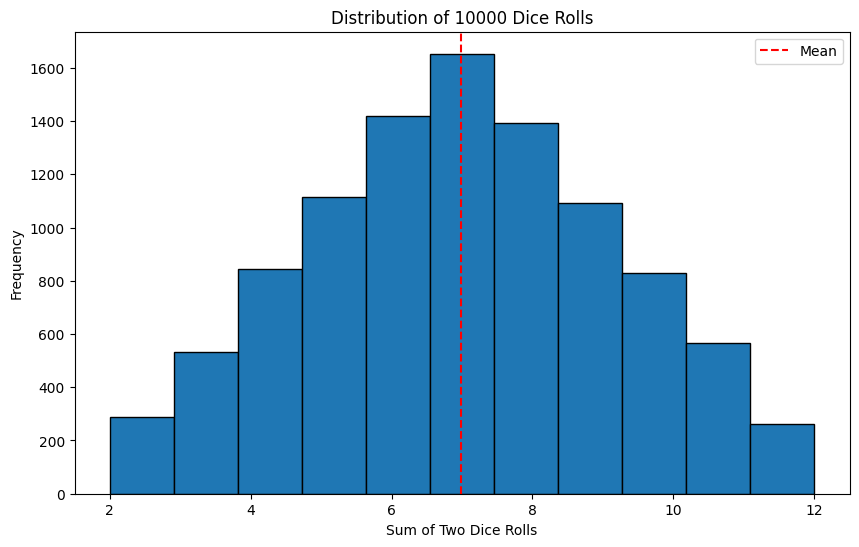

In [16]:
import matplotlib.pyplot as plt

num_rolls = 10_000
results, mean, std_dev = simulate_dice_rolls(num_rolls)

# Plot the distribution of the dice roll results
plt.figure(figsize=(10, 6))
plt.hist(results, bins=11, edgecolor='black')
plt.xlabel('Sum of Two Dice Rolls')
plt.ylabel('Frequency')
plt.title(f'Distribution of {num_rolls} Dice Rolls')
plt.axvline(x=mean, color='r', linestyle='--', label='Mean')
plt.legend()
plt.show()

This worked very well! We see a discrete distribution matching theory. The probabilities range from 1/36 to 1/6 from 2 to 7 in equally spaced increments of 1/36, as demonstrated in the plot.